In [1]:
import pandas as pd

df = pd.read_csv('data/FXStabilizer_EUR - Turbo.csv')
df

,Open Date,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,Pips,...,Drawdown,Risk:Reward,Max(pips),Max(USD),Min(pips),Min(USD),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(USD)
0,08/01/2025 15:35,08/01/2025 17:28,EURUSD,Sell,0.02,1.15808,1.15377,-0.2,0.00,43.1,...,32.9,0.08,43.3,8.66,-3.6,-0.72,92.3,99.6,-0.2,-0.04
1,08/01/2025 14:53,08/01/2025 17:28,EURUSD,Sell,0.01,1.15557,1.15377,-0.1,0.00,18.0,...,44.1,1.58,18.2,1.82,-28.7,-2.87,38.8,99.6,-0.2,-0.02
2,08/01/2025 14:45,08/01/2025 17:28,EURUSD,Sell,0.01,1.15300,1.15377,-0.1,0.00,-7.7,...,54.4,54.64,0.0,0.00,-54.4,-5.44,0.0,85.8,-7.7,-0.77
3,07/30/2025 21:03,08/01/2025 14:31,EURUSD,Buy,0.08,1.14223,1.14667,-0.8,-3.89,44.4,...,64.7,0.48,59.6,47.68,-28.6,-22.88,67.6,82.8,-15.2,-12.16
4,07/30/2025 20:45,08/01/2025 14:31,EURUSD,Buy,0.04,1.14565,1.14667,-0.4,-1.95,10.2,...,64.7,2.47,25.4,10.16,-62.8,-25.12,28.8,82.8,-15.2,-6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,04/05/2016 17:35,04/06/2016 10:17,EURUSD,Sell,0.01,1.13890,1.13440,0.0,0.01,45.0,...,7.4,0.15,45.0,4.50,-6.8,-0.68,86.9,100.0,0.0,0.00
4948,04/05/2016 09:15,04/05/2016 17:34,EURUSD,Buy,0.04,1.13480,1.13930,0.0,0.00,45.0,...,16.3,0.02,45.0,18.00,0.0,0.00,100.0,100.0,0.0,0.00
4949,04/04/2016 08:56,04/05/2016 17:34,EURUSD,Buy,0.02,1.13730,1.13930,0.0,-0.10,20.0,...,50.3,0.58,31.9,6.38,-18.4,-3.68,63.4,76.3,-11.9,-2.38
4950,04/04/2016 05:00,04/05/2016 17:34,EURUSD,Buy,0.01,1.13980,1.13930,0.0,-0.05,-5.0,...,46.3,12.63,3.4,0.34,-42.9,-4.29,7.3,81.9,-8.4,-0.84


In [2]:
df["Open Date"].min()

'01/06/2023 21:30'

In [3]:
df.columns

Index(['Open Date', 'Close Date', 'Symbol', 'Action', 'Units/Lots',
       'Open Price', 'Close Price', 'Commission', 'Swap', 'Pips', 'Profit',
       'Gain', 'Duration (DD:HH:MM:SS)', 'Profitable(%)',
       'Profitable(time duration)', 'Drawdown', 'Risk:Reward', 'Max(pips)',
       'Max(USD)', 'Min(pips)', 'Min(USD)', 'Entry Accuracy(%)',
       'Exit Accuracy(%)', 'ProfitMissed(pips)', 'ProfitMissed(USD)'],
      dtype='object')

In [4]:
import datetime

buy_trades = df[df['Action'] == 'Buy']
durations = buy_trades['Duration (DD:HH:MM:SS)'].dropna()

def duration_to_seconds(duration_str):
    dd, hh, mm, ss = map(int, duration_str.split(':'))
    return dd*86400 + hh*3600 + mm*60 + ss

seconds = durations.apply(duration_to_seconds)
median_seconds = seconds.median()

median_duration = str(datetime.timedelta(seconds=int(median_seconds)))
print("Median trade duration for Buy trades:", median_duration)

Median trade duration for Buy trades: 21:26:06


/var/folders/wq/5r6js2g51j3_3fb1s5zd343w0000gn/T/ipykernel_33091/3676762869.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('EURUSD=X',interval="30m", period="max")
[*********************100%***********************]  1 of 1 completed
/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


<Axes: xlabel='Datetime'>

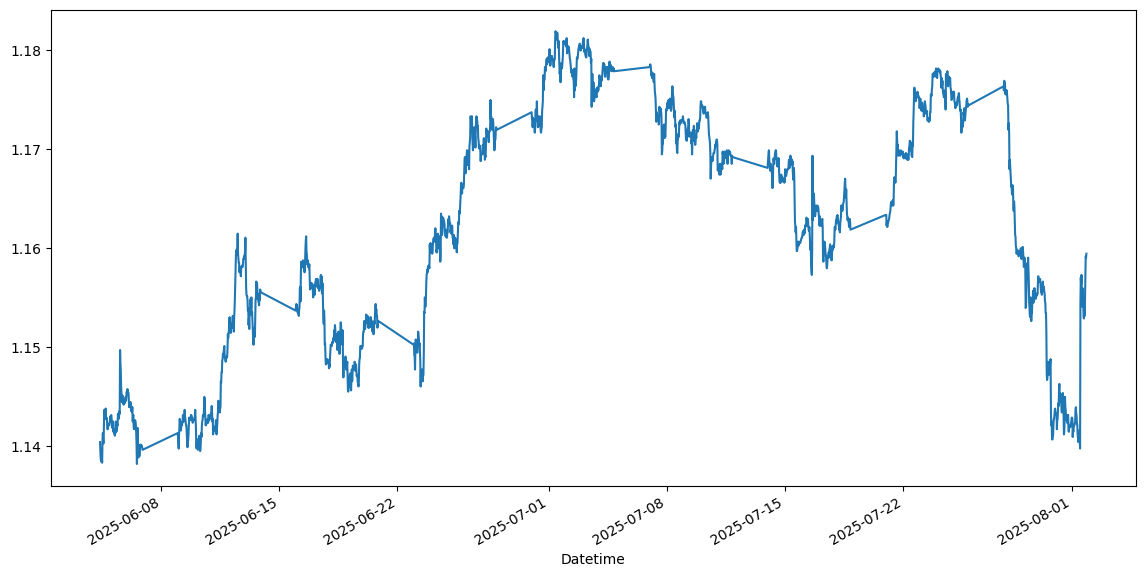

In [5]:
import yfinance as yf
from ta import add_all_ta_features
import matplotlib.pyplot as plt

data = yf.download('EURUSD=X',interval="30m", period="max")
# swap multilevel index
data = data.swaplevel(axis=1)
data = data["EURUSD=X"]
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")
data = data.ffill().bfill().fillna(0)
data['Close'].plot(figsize=(14, 7))


In [6]:
import numpy as np

# Initialize signal column with zeros
data['signal'] = 0

def nearest_slot(ts, slots):
    # Find the slot in slots that is closest to ts
    return slots[np.argmin(np.abs(slots - ts))]

for idx, row in df.iterrows():
    if row['Action'] in ['Buy', 'Sell'] and pd.notnull(row['Open Date']) and pd.notnull(row['Close Date']):
        open_dt = pd.to_datetime(row['Open Date'], utc=True)
        close_dt = pd.to_datetime(row['Close Date'], utc=True)
        # Find nearest slot in data.index
        open_slot = nearest_slot(open_dt, data.index)
        close_slot = nearest_slot(close_dt, data.index)
        if row['Action'] == 'Buy':
            data.at[open_slot, 'signal'] = 1
            data.at[close_slot, 'signal'] = -1
        elif row['Action'] == 'Sell':
            data.at[open_slot, 'signal'] = -1
            data.at[close_slot, 'signal'] = 1

data["signal"].value_counts()

signal
 0    1889
-1      68
 1      61
Name: count, dtype: int64

## now that we have signal try to correlate

<Axes: title={'center': 'Trading Signals'}, xlabel='Datetime'>

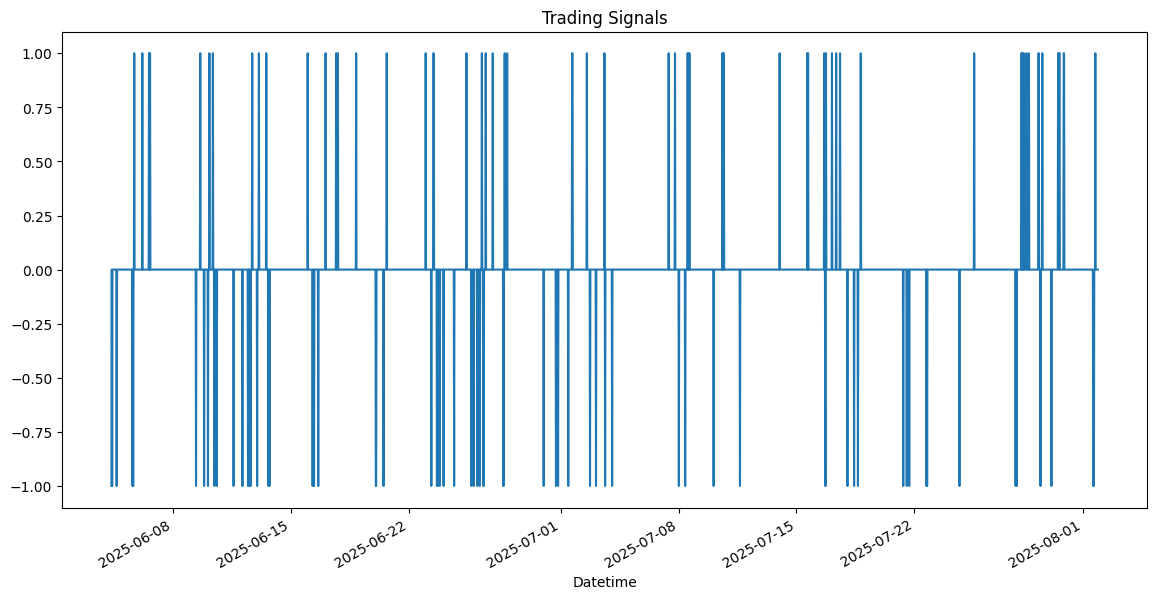

In [7]:
data["signal"].plot(figsize=(14, 7), title="Trading Signals")

In [8]:
# Correlation of 'signal' with all other columns
data.corr()["signal"].sort_values(ascending=False)

Price
signal                  1.000000
trend_vortex_ind_neg    0.236737
trend_adx_neg           0.227771
trend_dpo               0.185728
volatility_ui           0.171108
                          ...   
volume_mfi                   NaN
volume_nvi                   NaN
momentum_pvo                 NaN
momentum_pvo_signal          NaN
momentum_pvo_hist            NaN
Name: signal, Length: 92, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

# Example: Use all columns except 'signal' as features, and 'signal' as target
# Map signal values to 0, 1, 2 for classifier compatibility
y_mapped = data['signal'].map({-1: 0, 0: 1, 1: 2})
X = data.drop(columns=['signal'])
y = y_mapped

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# Remove inf and -inf values from X_train and X_test
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill remaining NaNs with 0 (or use another strategy if preferred)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [10]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.30      0.22        10
           1       0.95      0.93      0.94       379
           2       0.14      0.13      0.14        15

    accuracy                           0.89       404
   macro avg       0.42      0.45      0.43       404
weighted avg       0.90      0.89      0.89       404

Accuracy: 0.8861386138613861


In [11]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights to handle class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:38:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.33      0.20      0.25        10
           1       0.95      0.97      0.96       379
           2       0.42      0.33      0.37        15

    accuracy                           0.93       404
   macro avg       0.57      0.50      0.53       404
weighted avg       0.92      0.93      0.92       404

Accuracy: 0.9282178217821783


## imbalanced-learn

In [14]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Example with SMOTE
smote = SMOTE()
X_train_res_smote, y_train_res_smote = smote.fit_resample(X_train, y_train)
# Example with RandomOverSampler
ros = RandomOverSampler()
X_train_res_ros, y_train_res_ros = ros.fit_resample(X_train, y_train)

# SMOTE
xgb_clf.fit(X_train_res_smote, y_train_res_smote)

y_pred_smote = xgb_clf.predict(X_test)
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, digits=4))

# RandomOverSampler
xgb_clf.fit(X_train_res_ros, y_train_res_ros)

y_pred_ros = xgb_clf.predict(X_test)
print("Accuracy after RandomOverSampler:", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros, digits=4))

/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy after SMOTE: 0.9133663366336634
              precision    recall  f1-score   support

           0     0.2222    0.2000    0.2105        10
           1     0.9550    0.9525    0.9538       379
           2     0.3529    0.4000    0.3750        15

    accuracy                         0.9134       404
   macro avg     0.5101    0.5175    0.5131       404
weighted avg     0.9145    0.9134    0.9139       404



/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy after RandomOverSampler: 0.9257425742574258
              precision    recall  f1-score   support

           0     0.2857    0.2000    0.2353        10
           1     0.9509    0.9710    0.9608       379
           2     0.4000    0.2667    0.3200        15

    accuracy                         0.9257       404
   macro avg     0.5455    0.4792    0.5054       404
weighted avg     0.9140    0.9257    0.9191       404



### CatBoostClassifier

In [16]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(loss_function='MultiClass', auto_class_weights='Balanced', verbose=0)
cat_clf.fit(X_train_res_ros, y_train_res_ros)

y_pred_cat = cat_clf.predict(X_test)
print(classification_report(y_test, y_pred_cat, digits=4))


              precision    recall  f1-score   support

           0     0.1667    0.2000    0.1818        10
           1     0.9551    0.9551    0.9551       379
           2     0.3846    0.3333    0.3571        15

    accuracy                         0.9134       404
   macro avg     0.5021    0.4962    0.4980       404
weighted avg     0.9144    0.9134    0.9138       404



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb, digits=4))